In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd

# Small synthetic 2D dataset
data = {
    'x1': [1, 2, 3, 6, 7, 8],
    'x2': [2, 3, 4, 2, 3, 4],
    'y':  [5, 6, 7, 18, 20, 22]
}

df = pd.DataFrame(data)


In [37]:
def compute_mse_split(df, feature, threshold):
    # Split dataset
    left = df[df[feature] <= threshold]
    right = df[df[feature] > threshold]

    # If any side is empty, return inf MSE to skip this split
    if len(left) == 0 or len(right) == 0:
        return np.inf, None, None

    # Calculate group means
    mean_left = left['y'].mean()
    mean_right = right['y'].mean()

    # Calculate squared errors
    mse_left = ((left['y'] - mean_left) ** 2).sum()
    mse_right = ((right['y'] - mean_right) ** 2).sum()

    total_mse = (mse_left + mse_right) / len(df)

    return total_mse, mean_left, mean_right


In [38]:
features = ['x1', 'x2']
results = []

for feature in features:
    unique_vals = sorted(df[feature].unique())
    # Use midpoints between unique values as split candidates
    split_points = [(unique_vals[i] + unique_vals[i+1]) / 2 for i in range(len(unique_vals)-1)]

    for threshold in split_points:
        mse, mean_left, mean_right = compute_mse_split(df, feature, threshold)
        results.append({
            'Feature': feature,
            'Threshold': threshold,
            'MSE': mse,
            'Mean_Left': mean_left,
            'Mean_Right': mean_right
        })

results_df = pd.DataFrame(results).sort_values(by='MSE')
print(results_df)


  Feature  Threshold        MSE  Mean_Left  Mean_Right
2      x1        4.5   1.666667       6.00       20.00
3      x1        6.5  18.666667       9.00       21.00
1      x1        2.5  22.541667       5.50       16.75
4      x1        7.5  34.466667      11.20       22.00
0      x1        1.5  37.866667       5.00       14.60
5      x2        2.5  49.541667      11.50       13.75
6      x2        3.5  49.541667      12.25       14.50


In [39]:
best = results_df.iloc[0]
print("\nBest Split Found:")
print(best)



Best Split Found:
Feature             x1
Threshold          4.5
MSE           1.666667
Mean_Left          6.0
Mean_Right        20.0
Name: 2, dtype: object


In [40]:
def predict_2d(x1, x2, split_feature, threshold, mean_left, mean_right):
    value = x1 if split_feature == 'x1' else x2
    return mean_left if value <= threshold else mean_right

# Example prediction:
x_new = (5, 3)  # (x1, x2)
prediction = predict_2d(*x_new, best['Feature'], best['Threshold'], best['Mean_Left'], best['Mean_Right'])
print(f"\nPrediction for x = {x_new}: {prediction}")



Prediction for x = (5, 3): 20.0


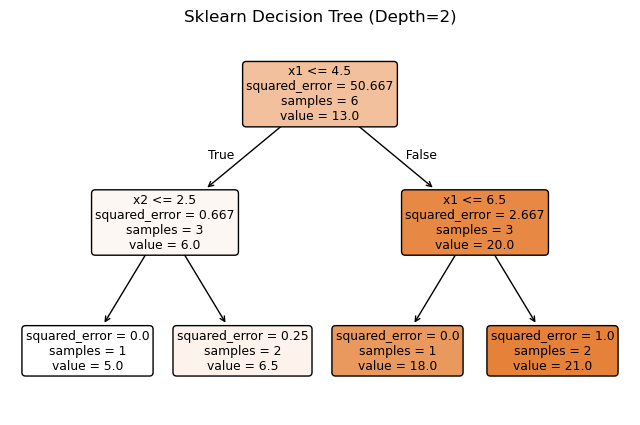

In [41]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Prepare features and target
X = df[['x1', 'x2']]
y = df['y']

# Fit a decision tree regressor (depth 1 to match manual)
model = DecisionTreeRegressor(max_depth=2)
model.fit(X, y)

# Plot the tree
plt.figure(figsize=(8, 5))
plot_tree(model, feature_names=['x1', 'x2'], filled=True, rounded=True)
plt.title("Sklearn Decision Tree (Depth=2)")
plt.show()


In [42]:
# Predict on training data (or test data if available)
y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)


In [43]:
# Show results
print(f"📊 Evaluation Metrics (Depth=2):")
print(f"Mean Squared Error (MSE):     {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE):    {mae:.2f}")
print(f"R-squared (R²):               {r2:.2f}")

📊 Evaluation Metrics (Depth=2):
Mean Squared Error (MSE):     0.42
Root Mean Squared Error (RMSE): 0.65
Mean Absolute Error (MAE):    0.50
R-squared (R²):               0.99
